# Edge detection of fishing net

In [1]:
%matplotlib inline
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
  
opencv image -> BGR not RBG  
so we need to change its order

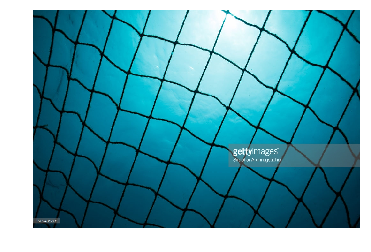

(683, 1024, 3)


In [2]:
filename1 = "Net1"
filenameF = ".jpg"
filename = filename1 + filenameF
plt.axis("off")
img = cv2.imread(filename, -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print(img.shape)

## Gaussian image filtering
we will use Canny edge detection algorithm, but it is susceptible to noise.  
So, the image is needed to reduce noise using filter (blur)  
- 5x5 Gaussian blur

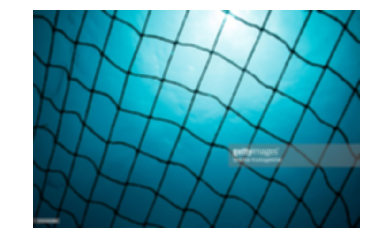

In [3]:
blur = cv2.GaussianBlur(img, (11,11), 7, 7)
plt.axis("off")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

## Canny edge detection

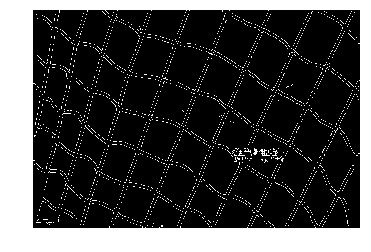

True

In [4]:
edges = cv2.Canny(blur, 68, 10)
plt.axis("off")
plt.imshow(edges, cmap="gray")
plt.show()
filename = filename1 + "_edge" + filenameF
cv2.imwrite(filename, edges)

In [5]:
# For further usage
#cedges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
cedges = np.copy(img)
cedgesP = np.copy(cedges)

### Edge point
0 = Nonedge  
255 = edge  
Image size: 683, 1024

## Line detection
Hough line detection test using edge image

### Standard Hough linetransform  
- edges: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)  
- lines: A vector that will store the parameters (r,θ) of the detected lines  
- rho : The resolution of the parameter r in pixels. We use 1 pixel.  
- theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)  
- threshold: The minimum number of intersections to "*detect*" a line  
- srn and stn: Default parameters to zero.

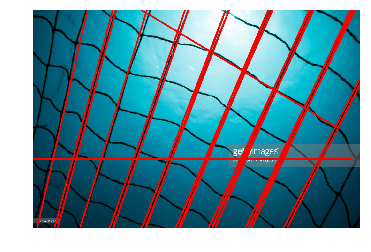

True

In [6]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 150, None, 0, 0)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        cv2.line(cedges, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.axis("off")
plt.imshow(cv2.cvtColor(cedges, cv2.COLOR_BGR2RGB))
plt.show()
filename = filename1 + "_lineS" + filenameF
cv2.imwrite(filename, cedges)

### Probabilistic Hough line transform
- edges: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)  
- linesP: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines  
- rho : The resolution of the parameter r in pixels. We use 1 pixel.  
- theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)  
- threshold: The minimum number of intersections to "*detect*" a line  
- minLinLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.  
- maxLineGap: The maximum gap between two points to be considered in the same line.  

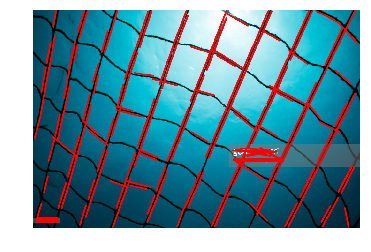

True

In [7]:
linesP = cv2.HoughLinesP(edges, 1, np.pi/180, 30, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cedgesP, (l[0], l[[1]]), (l[2], l[3]), (0,0,255), 3,
                cv2.LINE_AA)

plt.axis("off")
plt.imshow(cv2.cvtColor(cedgesP, cv2.COLOR_BGR2RGB))
plt.show()
filename = filename1 + "_lineP" + filenameF
cv2.imwrite(filename, cedgesP)

## Contour detection
For accuracy, use binary image (Canny edge detection outs binary image)

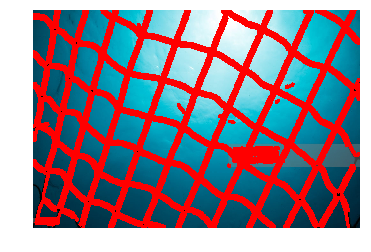

True

In [8]:
temp = img
con_img, contours, hierachy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
con_img = cv2.drawContours(temp, contours, -1, (0,0,255), 10)

plt.axis("off")
plt.imshow(cv2.cvtColor(con_img, cv2.COLOR_BGR2RGB))
plt.show()
filename = filename1 + "_cont" + filenameF
cv2.imwrite(filename, con_img)